In [1]:
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from torch.utils.data import DataLoader
from poc_data import PocDataset, display_sample


NUM_CASES = 2**2

poc_raw_dataset = PocDataset(num_cases=NUM_CASES, generate_meta=True, test_set=True, repays=False)
data_loader = DataLoader(dataset=poc_raw_dataset,
                        batch_size=NUM_CASES,
                        shuffle=False,
                        pin_memory=True)

all_data, all_data_length, all_event, all_meta = next(iter(data_loader))

In [3]:
print(all_data.shape)
print(all_data_length.shape)
print(all_event.shape)

torch.Size([4, 36, 5])
torch.Size([4, 1])
torch.Size([4, 1])


In [4]:
from losses import loss_1_batch, loss_2_batch, loss_3_batch

input_size = 5
output_size = input_size
MAX_LENGTH = 36
NUM_CAUSES = 3
hidden_size_encoder = 512
hidden_size_attention = 512
fc_size_encoder = 512
SIGMA = 1

LOSS_1_AMPLIFIER = 1
LOSS_2_AMPLIFIER = 1
LOSS_3_AMPLIFIER = 0.1

DEVICE = 'cpu'

In [5]:
## Sanity check on only events for loss 1
BATCH_LENGTH = 1

first_hitting_time_batch = torch.zeros(BATCH_LENGTH, MAX_LENGTH*NUM_CAUSES)

first_hitting_time_batch[0,16] = 0
first_hitting_time_batch[0,15] = 0
first_hitting_time_batch[0,14] = 1
first_hitting_time_batch[0,13] = 0
first_hitting_time_batch[0,12] = 0

batch_event = torch.zeros(BATCH_LENGTH, 1)
batch_event[0] = 0

batch_data_length = torch.zeros(BATCH_LENGTH, 1)
batch_data_length[0] = 15

loss1 = LOSS_1_AMPLIFIER*loss_1_batch(first_hitting_time_batch, batch_event, batch_data_length, MAX_LENGTH)
print("loss1=", loss1)

loss1= tensor(0.)


In [6]:
## Check including censoring events
BATCH_LENGTH = 1

first_hitting_time_batch = torch.zeros(BATCH_LENGTH, MAX_LENGTH*NUM_CAUSES)

first_hitting_time_batch[0,16] = 0
first_hitting_time_batch[0,15] = 0
first_hitting_time_batch[0,14] = 0
first_hitting_time_batch[0,13] = 0.02
first_hitting_time_batch[0,12] = 0.23
first_hitting_time_batch[0,9] = 0.25
first_hitting_time_batch[0,5] = 0.25

batch_event = torch.zeros(BATCH_LENGTH, 1)
batch_event[0] = 3

batch_data_length = torch.zeros(BATCH_LENGTH, 1)
batch_data_length[0] = 15

loss1 = LOSS_1_AMPLIFIER*loss_1_batch(first_hitting_time_batch, batch_event, batch_data_length, MAX_LENGTH)
print("loss1=", loss1)

loss1= tensor(0.0770)


In [13]:
## Checking full repays
BATCH_LENGTH = 1

first_hitting_time_batch = torch.zeros(BATCH_LENGTH, MAX_LENGTH*NUM_CAUSES)

first_hitting_time_batch[0,35 + 2*MAX_LENGTH] = 1
first_hitting_time_batch[0,34 + 2*MAX_LENGTH] = 0
first_hitting_time_batch[0,15 + 2*MAX_LENGTH] = 0
first_hitting_time_batch[0,14 + 2*MAX_LENGTH] = 0
first_hitting_time_batch[0,13 + 2*MAX_LENGTH] = 0
first_hitting_time_batch[0,12 + 2*MAX_LENGTH] = 0
first_hitting_time_batch[0,9 + 2*MAX_LENGTH] = 0
first_hitting_time_batch[0,5 + 2*MAX_LENGTH] = 0

batch_event = torch.zeros(BATCH_LENGTH, 1)
batch_event[0] = 2

batch_data_length = torch.zeros(BATCH_LENGTH, 1)
batch_data_length[0] = 36

loss1 = LOSS_1_AMPLIFIER*loss_1_batch(first_hitting_time_batch, batch_event, batch_data_length, MAX_LENGTH)
print("loss1=", loss1)

loss1= tensor(0.)


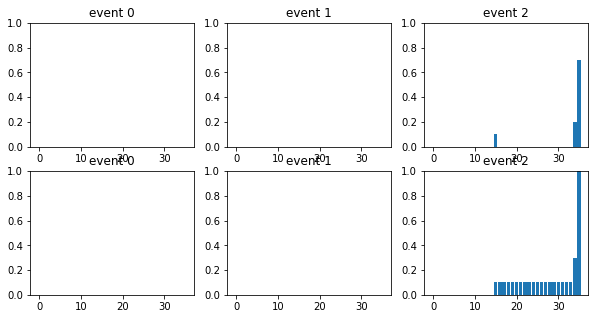

In [8]:
from utils import plot_fht, plot_cif, plot_fht_and_cif

first_hitting_time = first_hitting_time_batch[0]
plot_fht_and_cif(first_hitting_time, MAX_LENGTH)

#We bedoelen dat als bij event 0, de index 14 op 1 staat, dan is het na de 15de observation dat het gaat falen, dus na het data-inputje dat op index 14 staat, maar dus de 15de input is

In [9]:
loss1 = LOSS_1_AMPLIFIER*loss_1_batch(first_hitting_time_batch, batch_event, batch_data_length, MAX_LENGTH)
print("loss1=", loss1)

loss1= tensor(0.3567)


In [10]:
loss2 = LOSS_2_AMPLIFIER*loss_2_batch(first_hitting_time_batch, batch_event, batch_data_length, NUM_CAUSES, MAX_LENGTH, SIGMA, DEVICE)
print("loss2=", loss2)

loss2= tensor([0.])


In [11]:
#loss3 = LOSS_3_AMPLIFIER*loss_3_batch(output_batch, batch_data.detach())
#print("loss3=", loss3)